In [1]:
import pandas as pd
from PIL import Image
from os import path
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [5]:
df1 = pd.read_csv('E:\WhatsApp.txt', sep=r'[ap]m -', names=['time', 'message'])

c:\users\vinod\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
df2 = df1['message'].str.split(":", expand=True,n=1)
df_all = pd.concat([df1, df2], axis=1)
df_all = df_all.rename(columns={'message': 'total', 0:'name', 1:'message'})
df_all.drop('total', axis=1, inplace=True)

In [34]:
df1

,time,message
0,"12/01/2018, 14:44 - Messages to this group are...",None
1,"12/01/2018, 13:21 - Abhishek Krishna created g...",None
2,"12/01/2018, 14:44 - Abhishek Krishna added you",None
3,"12/01/2018, 13:21 - Abhishek Krishna changed t...",None
4,"12/01/2018, 13:22 - Ashutosh Rowdy: Ek aur group",None
5,"12/01/2018, 13:22 - Ashutosh Rowdy: ðŸ¤­",None
6,"12/01/2018, 13:25 - Abhishek Krishna: Kisi ka ...",None
7,"12/01/2018, 13:26 - Shudhanshu Singh: Ranjan K...",None
8,"12/01/2018, 13:26 - Abhishek Krishna: Aur us p...",None
9,"12/01/2018, 13:27 - Abhishek Krishna: Official...",None


In [35]:
df2

,0,1
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
5,None,None
6,None,None
7,None,None
8,None,None
9,None,None


In [36]:
df_all

,time,name,message
0,"12/01/2018, 14:44 - Messages to this group are...",,"12/01/2018, 14:44 - Messages to this group are..."
1,"12/01/2018, 13:21 - Abhishek Krishna created g...",,"12/01/2018, 13:21 - Abhishek Krishna created g..."
2,"12/01/2018, 14:44 - Abhishek Krishna added you",,"12/01/2018, 14:44 - Abhishek Krishna added you"
3,"12/01/2018, 13:21 - Abhishek Krishna changed t...",,"12/01/2018, 13:21 - Abhishek Krishna changed t..."
4,"12/01/2018, 13:22 - Ashutosh Rowdy: Ek aur group",,"12/01/2018, 13:22 - Ashutosh Rowdy: Ek aur group"
5,"12/01/2018, 13:22 - Ashutosh Rowdy: ðŸ¤­",,"12/01/2018, 13:22 - Ashutosh Rowdy: ðŸ¤­"
6,"12/01/2018, 13:25 - Abhishek Krishna: Kisi ka ...",,"12/01/2018, 13:25 - Abhishek Krishna: Kisi ka ..."
7,"12/01/2018, 13:26 - Shudhanshu Singh: Ranjan K...",,"12/01/2018, 13:26 - Shudhanshu Singh: Ranjan K..."
8,"12/01/2018, 13:26 - Abhishek Krishna: Aur us p...",,"12/01/2018, 13:26 - Abhishek Krishna: Aur us p..."
9,"12/01/2018, 13:27 - Abhishek Krishna: Official...",,"12/01/2018, 13:27 - Abhishek Krishna: Official..."


In [7]:
df_all.loc[df_all.time.str.contains(r'[a-zA-Z]')==True, 'message'] = df_all[df_all.time.str.contains(r'[a-zA-Z]')==True].time
df_all.fillna(' ', inplace=True)

In [8]:
df_all = df_all[df_all.name.str.contains("added|changed|created|left")==False]

In [9]:
text = ' '.join(df_all['message'])

In [10]:
STOPWORDS.update(["media", "omitted", ""])

In [31]:
pic = Image.open(r"E:\yy.jpg")

In [32]:
image_mask = np.array(pic)

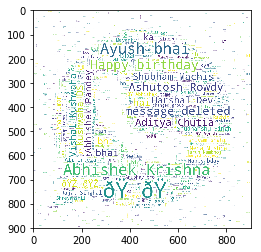

In [37]:
wc = WordCloud(background_color="white", max_words=1000, mask=image_mask, stopwords=STOPWORDS.add("said"))
wc.generate(text)
plt.imshow(wc)
wc.to_file("word_cloud5.png")